## Import Modules

In [1]:
import pandas as pd
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM, Dense
from keras import Sequential
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import pickle

## Data Loading

In [2]:
data=pd.read_csv('DataSet.csv')
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
classes=list(data.Category.unique())
classes

['ham', 'spam']

## Data preprocessing

In [4]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['Message'])

In [5]:
seq=tokenizer.texts_to_sequences(data['Message'])

In [6]:
maxlen=max(len(x)for x in seq)
maxlen

189

In [7]:
Num=len(tokenizer.word_index)+1
Num

9005

In [8]:
data['label']=[int(data['Category'][i]=='spam') for i in range(len(data['Category']))]
data.head()

,Category,Message,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [9]:
print("Total no. of examples in data set is :",len(data.label))

Total no. of examples in data set is : 5572


In [10]:
X = pad_sequences(seq, maxlen)
print(X[:2])

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0   49  471 4426  840  755  658   65    8 1327   88  123  351 1328
   148 2993 1329   67   58 4427  144]
 [   0    0    0    0    0

In [11]:
Y=np.array(data.label)
print(X.shape, Y.shape)

(5572, 189) (5572,)


In [12]:
x_train, x_val, y_train, y_val = train_test_split(X, Y, random_state=35, test_size=0.2)
print(x_train.shape, y_train.shape)

(4457, 189) (4457,)


## Model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 189, 512)          4610560   
_________________________________________________________________
bidirectional (Bidirectional (None, 189, 512)          1574912   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               656384    
_________________________________________________________________
dense (Dense)                (None, 1)                 257       
Total params: 6,842,113
Trainable params: 6,842,113
Non-trainable params: 0
_________________________________________________________________


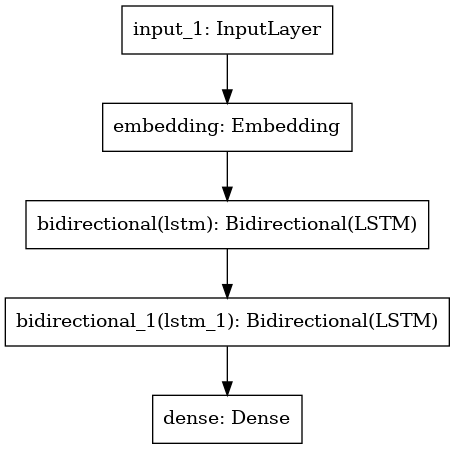

In [13]:
model = Sequential([
    Input(shape=(189,)),
    Embedding(Num, 512),
    Bidirectional(LSTM(256, return_sequences=True, dropout=0.25)),
    Bidirectional(LSTM(128, dropout=0.25)),
    Dense(1, activation='sigmoid')
])
model.summary()
plot_model(model)

In [14]:
model.compile(
    loss='BinaryCrossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

History = model.fit(
    x_train, y_train, 
    epochs=5,                    #from prev trails, We know that 5 epochs is enough.
    validation_data=(x_val, y_val)
).history

Epoch 1/5
140/140 [==============================] - 173s 1s/step - loss: 0.1086 - accuracy: 0.9623 - val_loss: 0.0441 - val_accuracy: 0.9848
Epoch 2/5
140/140 [==============================] - 164s 1s/step - loss: 0.0239 - accuracy: 0.9942 - val_loss: 0.0460 - val_accuracy: 0.9874
Epoch 3/5
140/140 [==============================] - 208s 1s/step - loss: 0.0080 - accuracy: 0.9984 - val_loss: 0.0347 - val_accuracy: 0.9901
Epoch 4/5
140/140 [==============================] - 166s 1s/step - loss: 0.0068 - accuracy: 0.9989 - val_loss: 0.0423 - val_accuracy: 0.9874
Epoch 5/5
140/140 [==============================] - 169s 1s/step - loss: 0.0047 - accuracy: 0.9989 - val_loss: 0.0571 - val_accuracy: 0.9901


## Model Evaluation

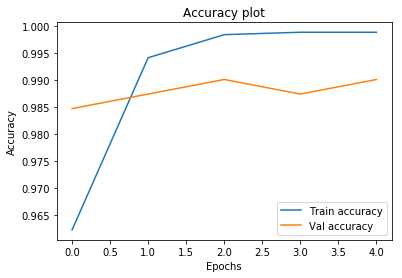

In [15]:
plt.title('Accuracy plot')
plt.plot(History['accuracy'])
plt.plot(History['val_accuracy'])
plt.legend(['Train accuracy', 'Val accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs');

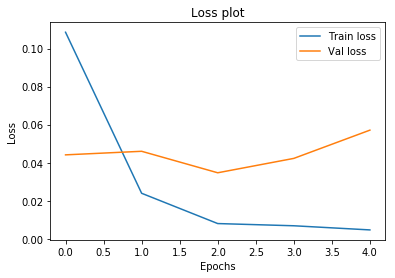

In [16]:
plt.title('Loss plot')
plt.plot(History['loss'])
plt.plot(History['val_loss'])
plt.legend(['Train loss', 'Val loss'])
plt.ylabel('Loss')
plt.xlabel('Epochs');

In [17]:
for i in tokenizer.sequences_to_texts(x_val[:5]):
    print(i,"\n")

hey i booked the kb on sat already what other lessons are we going for ah keep your sat night free we need to meet and confirm our lodging 

yeah i got a list with only u and joanna if i'm feeling really anti social 

so when you gonna get rimac access 

ur awarded a city break and could win a £200 summer shopping spree every wk txt store to 88039 skilgme tscs087147403231winawk age16 £1 50perwksub 

what you doing how are you 



In [18]:
[classes[x] for x in np.sum(model.predict(x_val[:5])>=0.5, axis=-1)]

['ham', 'ham', 'ham', 'spam', 'ham']

In [19]:
[classes[x] for x in y_val[:5]]

['ham', 'ham', 'ham', 'spam', 'ham']

In [20]:
model.save('./app/model.h5')
pickle.dump(tokenizer, open('./app/Tokenizer.pkl', 'wb'))